In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from google.colab import drive

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, Input, Normalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

# Authenticate 

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Setup Constants

In [ ]:
# data dir
data_dir = "gdrive/MyDrive/Bangkit Capstone/Colab Files/SaYoPillow.csv"
model_file = "gdrive/MyDrive/Bangkit Capstone/Colab Files/Stress-Level-Classification.hdf5"

# data constants
epochs = 50

In [ ]:
# read file

data=pd.read_csv(data_dir)
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
data = data[['sr', 'rr', 'sr.1', 'sl']]
data.head()

,sr,rr,sr.1,sl
0,93.80,25.680,1.840,3
1,91.64,25.104,1.552,3
2,60.00,20.000,7.000,1
3,85.76,23.536,0.768,3
4,48.12,17.248,8.248,0


In [ ]:
data.shape

(630, 4)

# Training Split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(data[['sr','rr', 'sr.1']], data['sl'], test_size=0.2, random_state=4)
X_train.shape, X_test.shape

((504, 3), (126, 3))

# One Hot Encoding

In [ ]:
classes=5
y_train=to_categorical(y_train, classes)
y_test=to_categorical(y_test, classes)
y_train[:5]

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Model

Multi layer perception.

In [ ]:
model=Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(5, "softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               512       
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                                 
Total params: 9,093
Trainable params: 9,093
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 14ms/step - loss: 0.2905 - accuracy: 0.8908 - val_loss: 0.1124 - val_accuracy: 0.9604
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9504 - val_loss: 0.1588 - val_accuracy: 0.9703
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.1627 - accuracy: 0.9181 - val_loss: 0.0859 - val_accuracy: 0.9802
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.1300 - accuracy: 0.9553 - val_loss: 0.0798 - val_accuracy: 0.9802
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.1096 - accuracy: 0.9702 - val_loss: 0.0768 - val_accuracy: 0.9802
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1141 - accuracy: 0.9603 - val_loss: 0.0784 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9603 - val_loss: 0.0691 - val_accuracy: 0.9802
Epoch 8/50
13/13 [=

# Training Visualization

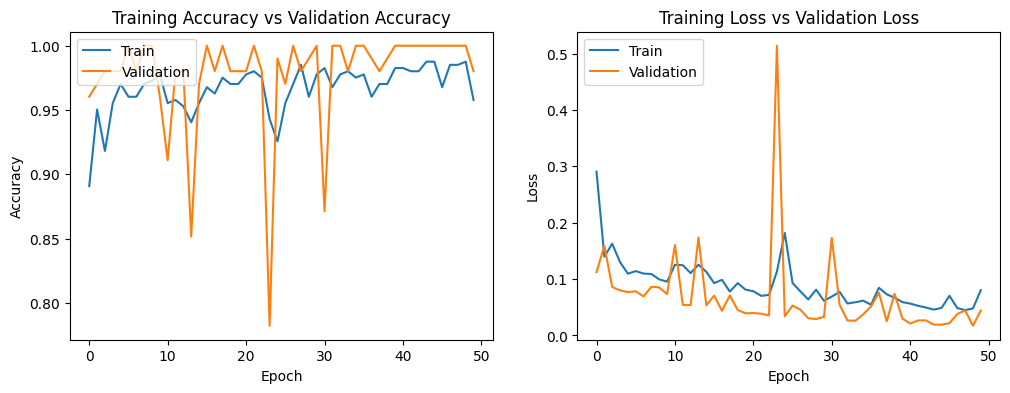

In [ ]:
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Save Model



In [ ]:
model.save(model_file)